In [2]:
import pandas as pd
import geopandas as gpd
from matplotlib import cm
from shapely.geometry import Point
from geopandas import GeoDataFrame
import seaborn as sns
import numpy as np

df = pd.read_csv('../../data/DATA_2.csv', delimiter=',', parse_dates=['Datetime'])

In [3]:
df_geometry = df[["Latitude","Longitude"]]

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_geometry)
X = scaler.transform(df_geometry)

In [5]:
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors

kmeans = KMeans(n_clusters=2, random_state=4,max_iter=3000)
kmeans.fit(X)

df_geometry["group"]=kmeans.labels_
df["group"]=kmeans.labels_

<ipython-input-5-36eee6aa8843>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_geometry["group"]=kmeans.labels_


In [6]:
df_map_world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
df_map_mexico = df_map_world.loc[df_map_world.name == "Mexico",:]

In [7]:
seismic_geometry = [Point(lat,lng) for lat,lng in zip(df_geometry["Longitude"],df_geometry["Latitude"])]
gdf_seismic_geometry = GeoDataFrame(df_geometry, geometry=seismic_geometry)

<AxesSubplot:>

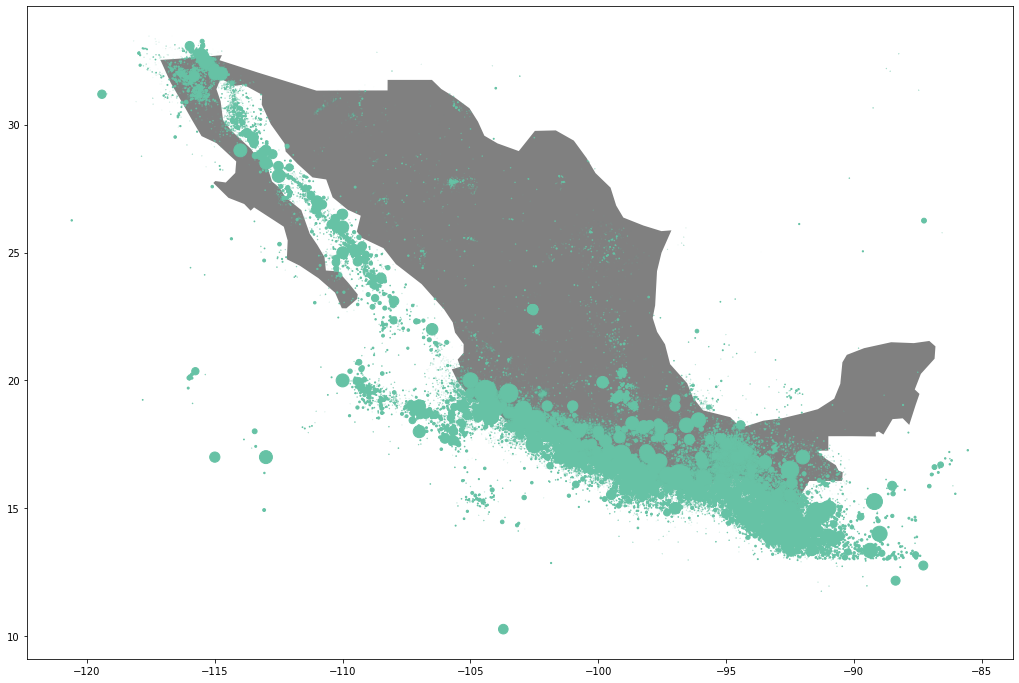

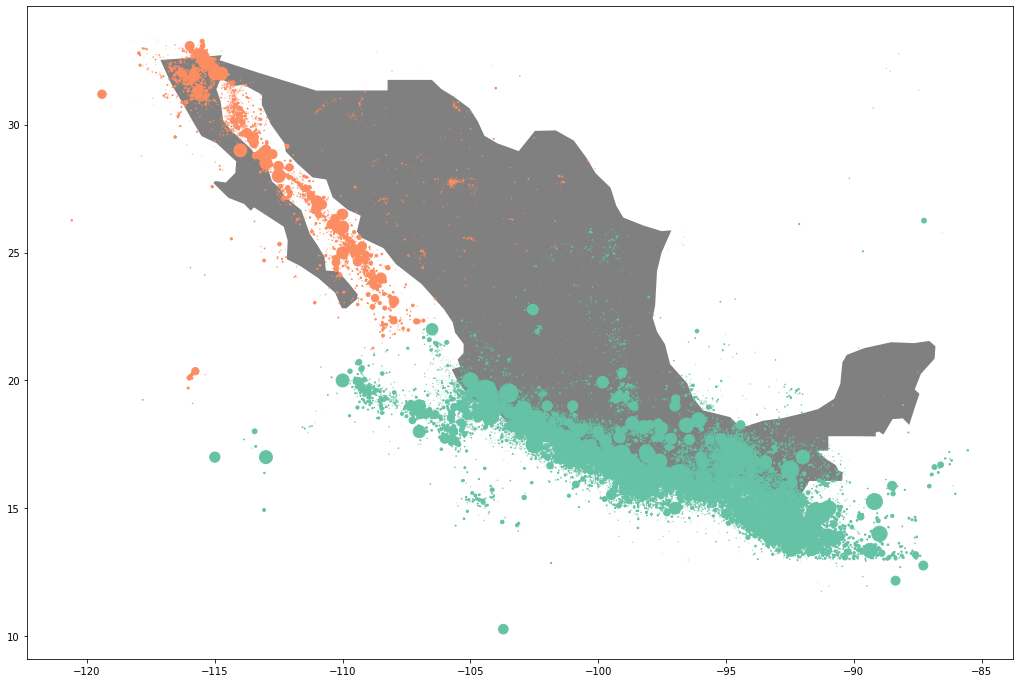

In [22]:
cmap = cm.get_cmap('Set2')
gdf_seismic_geometry.plot(ax=df_map_mexico.plot(figsize=(20, 12),color="grey"),color=(cmap(0)),markersize=(df.Magnitude-3.5).pow(4))
gdf_seismic_geometry.plot(ax=df_map_mexico.plot(figsize=(20, 12),color="grey"),color=df_geometry.group.map(cmap),markersize=(df.Magnitude-3.5).pow(4))

In [8]:
a=pd.DataFrame()
a["count"]=df.groupby("group")["group"].count()
a[["MagnitudeMean","DepthMean"]]=df.groupby("group")[["Magnitude","Depth"]].mean()
a

,count,MagnitudeMean,DepthMean
group,,,
0,192622,3.678061,34.816936
1,12184,3.622628,12.769567


In [9]:
sur=df[df["group"]==0].drop("group",axis=1)
norte=df[df["group"]==1].drop("group",axis=1)

In [10]:
norte.to_csv("../../data/DATA_2_north.csv", index=False)
sur.to_csv("../../data/DATA_2_south.csv", index=False)